In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
pd.set_option('display.max_columns',None)



from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly

sns.set(style='whitegrid')
plt.rcParams['figure.figsize']=(15,5)
%config InlineBackend.figure_format = 'png'
%matplotlib inline

Загружаем данные в датафреймы 

In [2]:
df_shops = pd.read_pickle("./df_shops.pkl")
df_points = pd.read_pickle("./df_points.pkl")
df_left = pd.read_pickle("./df_left.pkl")


In [3]:

df_category = pd.read_pickle("./df_category.pkl")
df_checks_with_cat = pd.read_pickle("./df_checks_with_cat.pkl")
df_pivot_table = pd.read_pickle("./df_pivot_table.pkl")
df_week_diff = pd.read_pickle("./df_week_diff.pkl")
df_week_diff_cum = pd.read_pickle("./df_week_diff_cum.pkl")


Выделяем молочную продукцию

In [4]:
df_checks_milk = df_checks_with_cat[df_checks_with_cat['name_gr'] == 'Молочная Продукция' ]

In [5]:
all_sales_bad = df_checks_milk[df_checks_milk['good_or_bad'] == -1 ]['BaseSum'].sum()
all_sales_average = df_checks_milk[df_checks_milk['good_or_bad'] == 0 ]['BaseSum'].sum()
all_sales_good = df_checks_milk[df_checks_milk['good_or_bad'] == 1 ]['BaseSum'].sum()

In [6]:
df_checks_milk.head(3)

,CheckUID,id_tt_cl,id_tov_cl,Quantity,date_ch,week,BaseSum,hour,name_gr,name_gr2,good_or_bad
0,374BC969-4D99-EC11-9064-005056A7A8DF,10864,52,1.0,2022-03-01,9,119.09,13,Молочная Продукция,Сметана,-1.0
1,6A9DF7ED-7899-EC11-9064-005056A7A8DF,10864,52,1.0,2022-03-01,9,119.09,18,Молочная Продукция,Сметана,-1.0
2,6FC5327A-8499-EC11-9064-005056A7A8DF,10864,52,1.0,2022-03-01,9,119.09,20,Молочная Продукция,Сметана,-1.0


In [7]:
df_checks_milk_pivot = df_checks_milk.pivot_table(columns=['hour'],index=['good_or_bad'],values = ['BaseSum'],aggfunc= 'sum',fill_value=0).reset_index()

In [8]:
df_checks_milk_pivot.set_index(df_checks_milk_pivot['good_or_bad'],inplace=True)
del df_checks_milk_pivot['good_or_bad']
df_checks_milk_pivot = df_checks_milk_pivot.transpose()

In [9]:
df_checks_milk_pivot

good_or_bad         -1.0          0.0         1.0
        hour                                     
BaseSum 0         813.56        84.00        0.00
        1         473.24        41.82        0.00
        2        1872.72       572.70        0.00
        3          50.91      1004.56        0.00
        4          70.91       250.91       75.45
        5        2098.70       210.18        0.00
        6        7640.12      2079.77      197.32
        7      785262.94    275120.65     7356.66
        8     2385948.78   2075685.31   503421.36
        9     3654148.11   3719846.68  2008228.16
        10    4219121.26   5017516.18  2718435.05
        11    5393122.68   6653913.53  3795858.76
        12    6365146.06   8135887.61  4605914.61
        13    6445531.44   8189689.23  4680016.67
        14    5969810.00   7703070.90  4424828.95
        15    5955317.41   7667993.08  4321982.85
        16    6504549.27   8189251.86  4572633.54
        17    7341607.55   9095351.45  5100458.98
        18    8658083.47  10202377.45  5781604.50
        19    8566505.91  10070002.23  5677720.64
        20    6694239.59   7900712.62  4367668.58
        21    4520395.37   5286119.27  2776377.98
        22    1585605.56    632735.55    99980.90
        23     436906.10    145285.13      708.56

In [10]:
df_checks_milk_pivot[-1] = df_checks_milk_pivot[-1].div(all_sales_bad).mul(100)
df_checks_milk_pivot[1] = df_checks_milk_pivot[1].div(all_sales_good).mul(100)
df_checks_milk_pivot[0] = df_checks_milk_pivot[0].div(all_sales_average).mul(100)

In [11]:
#df_checks_milk_pivot.plot(kind="barh",figsize=(10,50))

In [12]:
df_checks_milk

,CheckUID,id_tt_cl,id_tov_cl,Quantity,date_ch,week,BaseSum,hour,name_gr,name_gr2,good_or_bad
0,374BC969-4D99-EC11-9064-005056A7A8DF,10864,52,1.0,2022-03-01,9,119.09,13,Молочная Продукция,Сметана,-1.0
1,6A9DF7ED-7899-EC11-9064-005056A7A8DF,10864,52,1.0,2022-03-01,9,119.09,18,Молочная Продукция,Сметана,-1.0
2,6FC5327A-8499-EC11-9064-005056A7A8DF,10864,52,1.0,2022-03-01,9,119.09,20,Молочная Продукция,Сметана,-1.0
3,86F9A4A3-7199-EC11-9064-005056A7A8DF,10864,52,1.0,2022-03-01,9,119.09,18,Молочная Продукция,Сметана,-1.0
4,AC9C4F6B-5299-EC11-9064-005056A7A8DF,10864,52,1.0,2022-03-01,9,119.09,14,Молочная Продукция,Сметана,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
15963683,083B4692-F8E0-EC11-9064-005056A7A8DF,15714,59900,1.0,2022-05-31,22,22.91,18,Молочная Продукция,Детское ложковое молочное питание,0.0
15963684,AEF56458-EDE0-EC11-9064-005056A7A8DF,15714,59900,2.0,2022-05-31,22,45.82,17,Молочная Продукция,Детское ложковое молочное питание,0.0
15963685,C8345BA4-EDE0-EC11-9064-005056A7A8DF,15714,59900,2.0,2022-05-31,22,41.12,17,Молочная Продукция,Детское ложковое молочное питание,0.0
15963686,E0F234B2-F4E0-EC11-9064-005056A7A8DF,15714,59900,1.0,2022-05-31,22,22.73,18,Молочная Продукция,Детское ложковое молочное питание,0.0


In [13]:
df_checks_milk_variety = df_checks_milk.pivot_table(columns=['hour'],index=['good_or_bad'],values = ['id_tov_cl'],aggfunc= 'nunique',fill_value=0).reset_index()

In [14]:
df_checks_milk_variety

good_or_bad id_tov_cl                                                     \
hour                     0  1   2  3  4   5   6    7    8    9   10   11   12   
0           -1.0         6  6  10  1  1  12  35  303  319  335  332  334  338   
1            0.0         1  1   5  1  2   2  17  259  311  318  320  325  326   
2            1.0         0  0   0  0  1   0   4   61  278  303  306  311  315   

                                                             
hour   13   14   15   16   17   18   19   20   21   22   23  
0     333  336  337  342  341  339  342  344  337  327  304  
1     326  325  329  326  331  328  327  328  331  304  255  
2     319  314  311  313  320  318  322  317  312  216    9

In [15]:
df_checks_milk_variety.set_index(df_checks_milk_variety['good_or_bad'],inplace=True)
del df_checks_milk_variety['good_or_bad']

In [16]:
#df_checks_milk_variety.transpose().plot(kind="barh",figsize=(10,50))

In [17]:
df_checks_with_cat['Check_sum'] = df_checks_with_cat['BaseSum'].groupby(df_checks_with_cat['CheckUID']).transform('sum')

In [18]:
df_checks_with_cat['Item_milk_sum'] = df_checks_with_cat['BaseSum'].mul(	df_checks_with_cat['name_gr'] == 'Молочная Продукция')

In [19]:
df_checks_with_cat

,CheckUID,id_tt_cl,id_tov_cl,Quantity,date_ch,week,BaseSum,hour,name_gr,name_gr2,good_or_bad,Check_sum,Item_milk_sum
0,374BC969-4D99-EC11-9064-005056A7A8DF,10864,52,1.0,2022-03-01,9,119.09,13,Молочная Продукция,Сметана,-1.0,489.09,119.09
1,6A9DF7ED-7899-EC11-9064-005056A7A8DF,10864,52,1.0,2022-03-01,9,119.09,18,Молочная Продукция,Сметана,-1.0,518.18,119.09
2,6FC5327A-8499-EC11-9064-005056A7A8DF,10864,52,1.0,2022-03-01,9,119.09,20,Молочная Продукция,Сметана,-1.0,488.63,119.09
3,86F9A4A3-7199-EC11-9064-005056A7A8DF,10864,52,1.0,2022-03-01,9,119.09,18,Молочная Продукция,Сметана,-1.0,445.45,119.09
4,AC9C4F6B-5299-EC11-9064-005056A7A8DF,10864,52,1.0,2022-03-01,9,119.09,14,Молочная Продукция,Сметана,-1.0,639.54,119.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15963717,926946EB-0EE1-EC11-9064-005056A7A8DF,12618,37800,1.0,2022-05-31,22,85.00,21,Напитки,Соки,0.0,568.60,0.00
15963718,BBFD7F55-10E1-EC11-9064-005056A7A8DF,16061,24000,1.0,2022-05-31,22,75.00,21,"Сладости, кондитерские изделия",Пряники,-1.0,2126.15,0.00
15963719,61ACDF39-C8E0-EC11-9064-005056A7A8DF,16061,37800,1.0,2022-05-31,22,85.00,12,Напитки,Соки,-1.0,1254.70,0.00
15963720,0787699D-B3E0-EC11-9064-005056A7A8DF,16061,62800,1.0,2022-05-31,22,390.91,10,Мясо. Птица. П/ф охл. Яйца,Говядина.Телятина.,-1.0,517.77,0.00


In [20]:
df_checks_with_milk_percent = df_checks_with_cat.groupby(['CheckUID','id_tt_cl','Check_sum']).Item_milk_sum.agg('sum').reset_index()

Классфицицируем чеки по объему и проценту молочки

In [21]:
conditions_m = [
    (df_checks_with_milk_percent['Item_milk_sum'] == 0),
    ((df_checks_with_milk_percent['Item_milk_sum'] > 0) & (df_checks_with_milk_percent['Item_milk_sum'] <= 100)),
    ((df_checks_with_milk_percent['Item_milk_sum'] > 100) & (df_checks_with_milk_percent['Item_milk_sum'] <= 150)),
    ((df_checks_with_milk_percent['Item_milk_sum'] > 150) & (df_checks_with_milk_percent['Item_milk_sum'] <= 200)),
    ((df_checks_with_milk_percent['Item_milk_sum'] > 200) & (df_checks_with_milk_percent['Item_milk_sum'] <= 300)),
    ((df_checks_with_milk_percent['Item_milk_sum'] > 300) & (df_checks_with_milk_percent['Item_milk_sum'] <= 500)),
    ((df_checks_with_milk_percent['Item_milk_sum'] > 500) & (df_checks_with_milk_percent['Item_milk_sum'] <= 1000)),
    ((df_checks_with_milk_percent['Item_milk_sum'] > 1000) & (df_checks_with_milk_percent['Item_milk_sum'] <= 2000)),
    (df_checks_with_milk_percent['Item_milk_sum'] > 2000) 
]
values_m = ['M_0','M_0_100','M_100_150','M_150_200','M_200_300','M_300_500','M_500_1000','M_1000_2000','M_2000']

df_checks_with_milk_percent['milk_sum'] = np.select(conditions_m,values_m )

In [22]:
conditions_s = [
    ((df_checks_with_milk_percent['Check_sum'] > 0) & (df_checks_with_milk_percent['Check_sum'] <= 200)),
    ((df_checks_with_milk_percent['Check_sum'] > 200) & (df_checks_with_milk_percent['Check_sum'] <= 500)),
    ((df_checks_with_milk_percent['Check_sum'] > 500) & (df_checks_with_milk_percent['Check_sum'] <= 1000)),
    ((df_checks_with_milk_percent['Check_sum'] > 1000) & (df_checks_with_milk_percent['Check_sum'] <= 1500)),
    ((df_checks_with_milk_percent['Check_sum'] > 1500) & (df_checks_with_milk_percent['Check_sum'] <= 2000)),
    ((df_checks_with_milk_percent['Check_sum'] > 2000) & (df_checks_with_milk_percent['Check_sum'] <= 3000)),
    (df_checks_with_milk_percent['Check_sum'] > 3000) 
]
values_s = ['0_200','200_500','500_1000','1000_1500','1500_2000','2000_3000','3000']

df_checks_with_milk_percent['revenue'] = np.select(conditions_s,values_s)

In [23]:
good_shops = df_shops['id_tt'].loc[df_shops['good_or_bad'] == 1].values.tolist()
bad_shops = df_shops['id_tt'].loc[df_shops['good_or_bad'] == -1].values.tolist()

In [24]:
df_milk_checks_good_shop = df_checks_with_milk_percent[df_checks_with_milk_percent['id_tt_cl'].isin(good_shops)]
df_milk_checks_bad_shop = df_checks_with_milk_percent[df_checks_with_milk_percent['id_tt_cl'].isin(bad_shops)]

In [25]:
df_milk_checks_good_shop_p = df_milk_checks_good_shop.pivot_table(columns=['revenue'], index=['milk_sum'], values = ['Check_sum'],aggfunc= 'sum',fill_value=0 ).reset_index()
df_milk_checks_good_shop_p.set_index(df_milk_checks_good_shop_p['milk_sum'],inplace=True)
df_milk_checks_good_shop_p = df_milk_checks_good_shop_p['Check_sum']
df_milk_checks_good_shop_p = df_milk_checks_good_shop_p.div(df_milk_checks_good_shop_p.values.sum()).mul(100)
del df_milk_checks_good_shop_p ['0']

In [26]:
df_milk_checks_bad_shop_p = df_milk_checks_bad_shop.pivot_table(columns=['revenue'], index=['milk_sum'], values = ['Check_sum'],aggfunc= 'sum',fill_value=0 ).reset_index()
df_milk_checks_bad_shop_p.set_index(df_milk_checks_bad_shop_p['milk_sum'],inplace=True)
df_milk_checks_bad_shop_p = df_milk_checks_bad_shop_p['Check_sum']
df_milk_checks_bad_shop_p = df_milk_checks_bad_shop_p.div(df_milk_checks_bad_shop_p.values.sum()).mul(100)
del df_milk_checks_bad_shop_p ['0']

In [27]:
df_milk_checks_good_shop_p

revenue,0_200,1000_1500,1500_2000,2000_3000,200_500,3000,500_1000
milk_sum,,,,,,,
M_0,5.739219,6.791219,3.045836,2.158940,15.940529,0.856435,16.087497
M_0_100,1.673645,2.495392,1.227128,0.885806,3.954547,0.334625,5.036427
M_1000_2000,0.000000,0.058217,0.053528,0.087933,0.000000,0.165107,0.000000
M_100_150,0.763282,1.517190,0.799788,0.623948,1.730585,0.253766,2.544856
M_150_200,0.462601,1.250286,0.656004,0.581483,1.139938,0.262677,1.915376
M_2000,0.000000,0.000000,0.000000,0.005552,0.000000,0.018384,0.000000
M_200_300,0.000000,1.723908,1.032670,0.928083,1.705632,0.543452,2.408252
M_300_500,0.000000,1.561924,1.085361,1.128741,0.854502,0.741585,1.813660
M_500_1000,0.000000,0.671540,0.560579,0.743738,0.000000,0.718651,0.659975


In [28]:
df_milk_checks_bad_shop_p = df_milk_checks_bad_shop_p[['0_200','200_500','500_1000','1000_1500','1500_2000','2000_3000','3000']]
df_milk_checks_bad_shop_p.reindex(['M_0','M_0_100','M_100_150','M_150_200','M_200_300','M_300_500','M_500_1000','M_1000_2000','M_2000'])
df_milk_checks_bad_shop_p

revenue,0_200,200_500,500_1000,1000_1500,1500_2000,2000_3000,3000
milk_sum,,,,,,,
M_0,6.303855,16.796160,16.083748,7.298257,3.560479,2.733890,1.361349
M_0_100,1.420858,3.493618,4.351139,2.392902,1.261377,0.998266,0.473036
M_1000_2000,0.000000,0.000000,0.000000,0.041308,0.054443,0.078577,0.219463
M_100_150,0.581764,1.432566,2.260732,1.419829,0.825500,0.725614,0.355457
M_150_200,0.340185,0.913872,1.649393,1.149390,0.708710,0.658467,0.363772
M_2000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005306,0.016767
M_200_300,0.000000,1.284945,2.037671,1.642628,1.093744,1.106710,0.647480
M_300_500,0.000000,0.609613,1.442972,1.349079,1.065048,1.225786,0.926198
M_500_1000,0.000000,0.000000,0.502631,0.527933,0.509380,0.752641,0.945493


In [29]:
df_milk_checks_good_shop_p = df_milk_checks_good_shop_p[['0_200','200_500','500_1000','1000_1500','1500_2000','2000_3000','3000']]
df_milk_checks_good_shop_p.reindex(['M_0','M_2000','M_1000_2000','M_500_1000','M_300_500','M_200_300','M_150_200','M_100_150','M_0_100'])
df_milk_checks_good_shop_p

revenue,0_200,200_500,500_1000,1000_1500,1500_2000,2000_3000,3000
milk_sum,,,,,,,
M_0,5.739219,15.940529,16.087497,6.791219,3.045836,2.158940,0.856435
M_0_100,1.673645,3.954547,5.036427,2.495392,1.227128,0.885806,0.334625
M_1000_2000,0.000000,0.000000,0.000000,0.058217,0.053528,0.087933,0.165107
M_100_150,0.763282,1.730585,2.544856,1.517190,0.799788,0.623948,0.253766
M_150_200,0.462601,1.139938,1.915376,1.250286,0.656004,0.581483,0.262677
M_2000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005552,0.018384
M_200_300,0.000000,1.705632,2.408252,1.723908,1.032670,0.928083,0.543452
M_300_500,0.000000,0.854502,1.813660,1.561924,1.085361,1.128741,0.741585
M_500_1000,0.000000,0.000000,0.659975,0.671540,0.560579,0.743738,0.718651


In [30]:
df_milk_checks_dif_shop_p = df_milk_checks_good_shop_p - df_milk_checks_bad_shop_p

In [31]:
df_milk_checks_dif_shop_p

revenue,0_200,200_500,500_1000,1000_1500,1500_2000,2000_3000,3000
milk_sum,,,,,,,
M_0,-0.564636,-0.855631,0.003749,-0.507038,-0.514643,-0.574950,-0.504913
M_0_100,0.252788,0.460929,0.685288,0.102489,-0.034249,-0.112460,-0.138411
M_1000_2000,0.000000,0.000000,0.000000,0.016909,-0.000915,0.009356,-0.054356
M_100_150,0.181517,0.298019,0.284124,0.097361,-0.025711,-0.101666,-0.101690
M_150_200,0.122416,0.226066,0.265984,0.100896,-0.052707,-0.076983,-0.101095
M_2000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000246,0.001617
M_200_300,0.000000,0.420686,0.370581,0.081281,-0.061074,-0.178627,-0.104028
M_300_500,0.000000,0.244889,0.370689,0.212844,0.020313,-0.097044,-0.184613
M_500_1000,0.000000,0.000000,0.157345,0.143607,0.051199,-0.008903,-0.226842


In [32]:
df_milk_checks_dif_shop_p = df_milk_checks_dif_shop_p.reindex(['M_0','M_2000','M_1000_2000','M_500_1000','M_300_500','M_200_300','M_150_200','M_100_150','M_0_100'])

<AxesSubplot:xlabel='revenue', ylabel='milk_sum'>

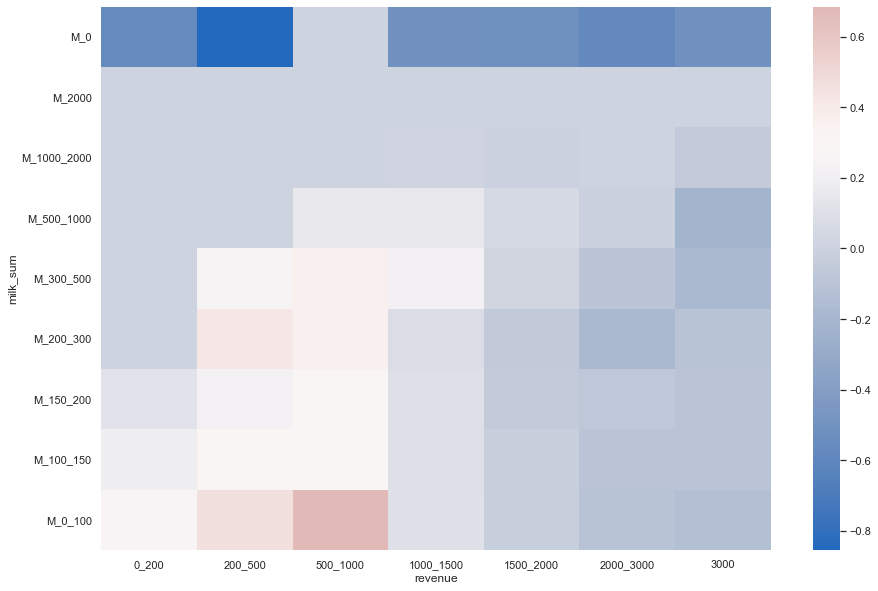

In [33]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_milk_checks_dif_shop_p,cmap='vlag',center = 0.3)

In [34]:
df_milk_checks_dif_shop_percent = df_milk_checks_dif_shop_p.div(df_milk_checks_bad_shop_p)

In [35]:
df_milk_checks_dif_shop_percent
df_milk_checks_dif_shop_percent = df_milk_checks_dif_shop_percent.reindex(['M_0','M_2000','M_1000_2000','M_500_1000','M_300_500','M_200_300','M_150_200','M_100_150','M_0_100'])


In [36]:
df_milk_checks_dif_shop_percent

revenue,0_200,200_500,500_1000,1000_1500,1500_2000,2000_3000,3000
milk_sum,,,,,,,
M_0,-0.089570,-0.050942,0.000233,-0.069474,-0.144543,-0.210305,-0.370892
M_2000,NaN,NaN,NaN,NaN,NaN,0.046275,0.096414
M_1000_2000,NaN,NaN,NaN,0.409336,-0.016801,0.119066,-0.247677
M_500_1000,NaN,NaN,0.313042,0.272017,0.100512,-0.011830,-0.239919
M_300_500,NaN,0.401713,0.256892,0.157770,0.019073,-0.079169,-0.199323
M_200_300,NaN,0.327396,0.181865,0.049482,-0.055840,-0.161403,-0.160666
M_150_200,0.359851,0.247371,0.161262,0.087782,-0.074370,-0.116913,-0.277907
M_100_150,0.312011,0.208031,0.125678,0.068572,-0.031146,-0.140111,-0.286084
M_0_100,0.177912,0.131934,0.157496,0.042830,-0.027152,-0.112655,-0.292601


<AxesSubplot:xlabel='revenue', ylabel='milk_sum'>

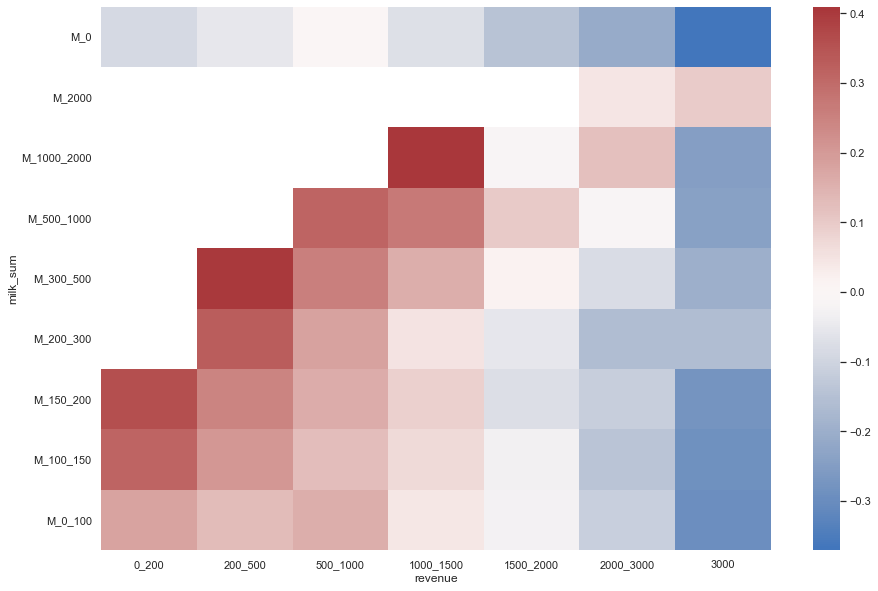

In [37]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_milk_checks_dif_shop_percent,cmap='vlag',center = 0.0)

<AxesSubplot:xlabel='revenue', ylabel='milk_sum'>

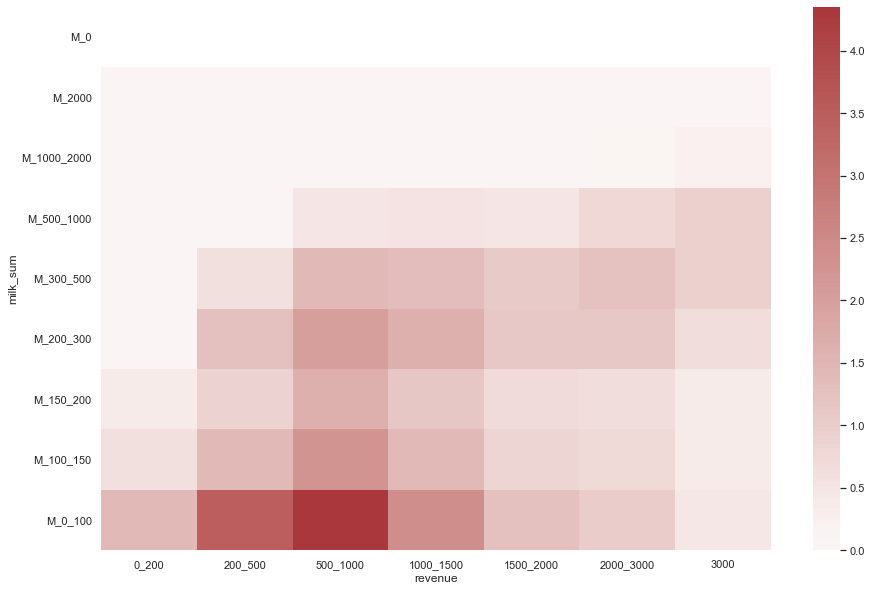

In [106]:
plt.figure(figsize=(15, 10))
df_milk_checks_bad_shop_p = df_milk_checks_bad_shop_p.reindex(['M_0','M_2000','M_1000_2000','M_500_1000','M_300_500','M_200_300','M_150_200','M_100_150','M_0_100'])

sns.heatmap(df_milk_checks_bad_shop_p,cmap='vlag',center = 0.0)

In [107]:
df_milk_checks_bad_shop_p

revenue,0_200,200_500,500_1000,1000_1500,1500_2000,2000_3000,3000
milk_sum,,,,,,,
M_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M_2000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005306,0.016767
M_1000_2000,0.000000,0.000000,0.000000,0.041308,0.054443,0.078577,0.219463
M_500_1000,0.000000,0.000000,0.502631,0.527933,0.509380,0.752641,0.945493
M_300_500,0.000000,0.609613,1.442972,1.349079,1.065048,1.225786,0.926198
M_200_300,0.000000,1.284945,2.037671,1.642628,1.093744,1.106710,0.647480
M_150_200,0.340185,0.913872,1.649393,1.149390,0.708710,0.658467,0.363772
M_100_150,0.581764,1.432566,2.260732,1.419829,0.825500,0.725614,0.355457
M_0_100,1.420858,3.493618,4.351139,2.392902,1.261377,0.998266,0.473036


In [104]:
df_milk_checks_bad_shop_p.drop( 'M_0', axis=0, inplace=True)